# Keras

## Import libraries and download data

In [ ]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   cats_and_dogs_filtered.zip

--2021-11-25 08:23:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   180MB/s    in 0.4s    

2021-11-25 08:23:01 (180 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [1]:
import os
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import time
import copy
from PIL import Image

#keras
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

PyTorch Version:  1.11.0+cu113
Torchvision Version:  0.12.0+cu113


In [ ]:
# extract files from archive
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

# set the paths to validation and training
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


# add augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# create file generators
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


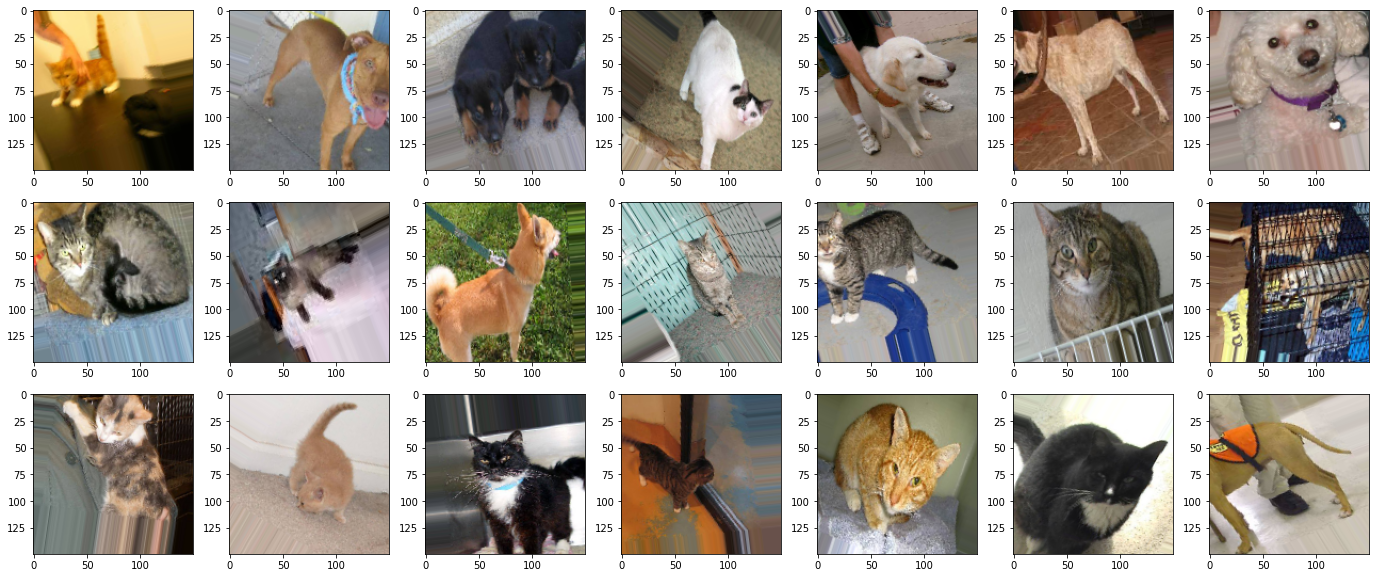

In [ ]:
n_row, n_col = 3, 7
fig, ax = plt.subplots(n_row, n_col, figsize=(24, 10))
ax = ax.flatten()
for place, image in enumerate(range(n_row*n_col)):
  ax[place].imshow(train_generator.next()[0][image])

## Training 

In [ ]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), 
                                include_top=False, 
                                weights='imagenet')
pre_trained_model.summary()

In [ ]:
# freeze the layers of the model
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
# take the output from the pre-trained model
x = pre_trained_model.output
latent = x

x = layers.GlobalAveragePooling2D()(x)

# add two fully connected layers, the second for classification
x = layers.Dense(16, activation='relu')(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# compile
model = Model(pre_trained_model.input, predictions)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=4,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/4
63/63 [==============================] - 39s 387ms/step - loss: 0.3761 - acc: 0.8365 - val_loss: 0.1223 - val_acc: 0.9480
Epoch 2/4
63/63 [==============================] - 21s 331ms/step - loss: 0.1831 - acc: 0.9250 - val_loss: 0.1269 - val_acc: 0.9470
Epoch 3/4
63/63 [==============================] - 22s 342ms/step - loss: 0.1697 - acc: 0.9200 - val_loss: 0.1186 - val_acc: 0.9510
Epoch 4/4
63/63 [==============================] - 21s 335ms/step - loss: 0.1646 - acc: 0.9250 - val_loss: 0.1049 - val_acc: 0.9600


# PyTorch 

## Import libraries and download data

In [4]:
#pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader,Dataset
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.11.0+cu113
Torchvision Version:  0.12.0+cu113


In [2]:
device = 'cuda' if torch.cuda.is_available() == True else 'cpu'
print(device)

cuda


In [20]:
input_size = 224
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [22]:
batch_size = 8
data_dir = "/content/drive/MyDrive/Colab_Notebooks/cats_and_dogs_filtered"

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), 
                                          data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


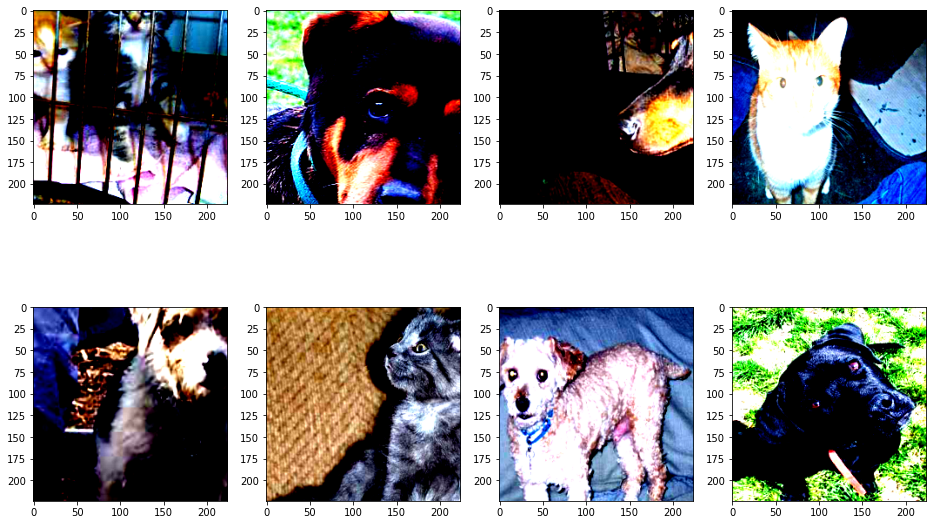

In [73]:
n_row, n_col = 2, 4
fig, ax = plt.subplots(n_row, n_col, figsize=(16, 10))
ax = ax.flatten()
for place, image in enumerate(range(n_row*n_col)):
  ax[place].imshow(iter(dataloaders_dict['train']).next()[0][image].permute(1, 2, 0).numpy());

## Training

In [17]:
num_classes = 2
# not train the entire model
feature_extract = True

In [18]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    val_acc_history = []
    best_acc = 0.0
    best_acc_epoch = None
    model.to(device)
    for epoch in range(1, num_epochs+1):
        print(f'Epoch {epoch}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                  outputs = model(inputs.to(device))
                  loss = criterion(outputs, labels)

                  _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                  if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val':
              val_acc_history.append(epoch_acc)
            if len(val_acc_history)>1:
              if epoch_acc>best_acc:
                best_acc = max(val_acc_history)
                best_acc_epoch = epoch

    print(f'Best val Acc: {best_acc:4f} at {best_acc_epoch} epoch')
    return model, val_acc_history

In [19]:
model_ft = models.resnet18(pretrained=True)

for param in model_ft.parameters():
  param.requires_grad = False

num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_ft.named_parameters

In [24]:
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [27]:
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [29]:
# Train and evaluate
num_epochs = 3
model_ft, hist = train_model(model_ft, 
                             dataloaders_dict, 
                             criterion, optimizer_ft, 
                             num_epochs=num_epochs)

Epoch 1/3
----------
train Loss: 0.2799 Acc: 0.8855
val Loss: 0.1055 Acc: 0.9570
Epoch 2/3
----------
train Loss: 0.2721 Acc: 0.8825
val Loss: 0.0494 Acc: 0.9790
Epoch 3/3
----------
train Loss: 0.2714 Acc: 0.8885
val Loss: 0.0490 Acc: 0.9820
Best val Acc: 0.982000 at 3 epoch


## Test images

In [2]:
def pre_image(image_path,model):
   img = Image.open(image_path)
   mean = [0.485, 0.456, 0.406] 
   std = [0.229, 0.224, 0.225]
   transform_norm = transforms.Compose([transforms.ToTensor(), 
   transforms.Resize((224,224)),transforms.Normalize(mean, std)])
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # input = Variable(image_tensor)
   img_normalized = img_normalized.to(device)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()  
      output =model(img_normalized)
     # print(output)
      index = output.data.cpu().numpy().argmax()
      classes = image_datasets['train'].classes
      class_name = classes[index]
      return class_name

In [125]:
predict_class1 = pre_image("./test/10176.jpeg",model_ft)
predict_class2 = pre_image("./test/images.jpeg",model_ft)

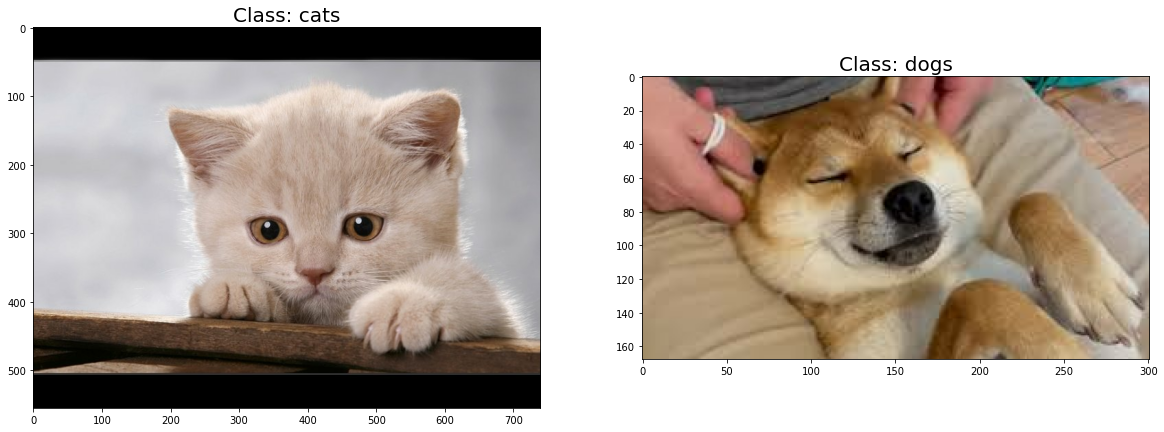

In [131]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
img1 = io.read_file('./test/10176.jpeg')
img1 = image.decode_png(img1, channels=3)
img2 = io.read_file('./test/images.jpeg')
img2 = image.decode_png(img2, channels=3)
ax1.imshow(img1)
ax1.set_title(f'Class: {predict_class1}', fontdict={'fontsize':20})
ax2.imshow(img2)
ax2.set_title(f'Class: {predict_class2}', fontdict={'fontsize':20});